# Reproduce Figure 3 in Gaillard et al. 2014

This notebook uses my code to (mostly) reproduce Figure 3 in Gaillard et al. 2014.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
from VolcGases.functions import solve_gases

In [2]:
mCO2tot=600e-6
mH2Otot=1000e-6

x = 0.01550152865954013
# molar mass in g/mol
M_H2O = 18.01528
M_CO2 = 44.01
# calculate mol fraction of CO2 and H2O in the magma
xCO2tot=(mCO2tot/M_CO2)/x
xH2Otot=(mH2Otot/M_H2O)/x



# set total pressure and temperature
n = 100
T = 1473 # kelvin
FMQ = -1.4
PP = np.logspace(-6,3,n)

H2O = []
H2 = []
CO2 = []
CO = []
CH4 = []
xx_CO2 = []
xx_H2O = []
ff_O2 = []
for i in range(0,n):
    P = PP[i]
    # set the Oxygen fugacity to FMQ
    A = 25738
    B = 9
    C = 0.092
    log_FMQ = (-A/T+B+C*(P-1)/T)
    f_O2 = 10**(log_FMQ+FMQ)
    # set to FMQ
    
    ff_O2.append(f_O2)


    P_H2O,P_H2,P_CO2,P_CO,P_CH4,alphaG,x_CO2,x_H2O = solve_gases(T,P,f_O2,mCO2tot,mH2Otot)
    
    
    H2O.append(P_H2O)
    H2.append(P_H2)
    CO2.append(P_CO2)
    CO.append(P_CO)
    CH4.append(P_CH4)
    xx_H2O.append(x_H2O)
    xx_CO2.append(x_CO2)
    
    

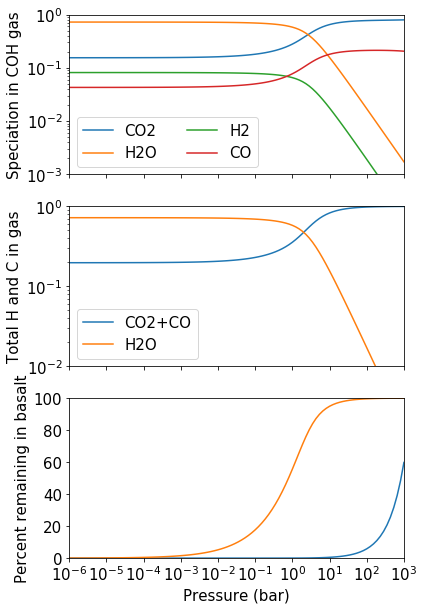

In [3]:
# plot results in similar format to Gaillard 2014 Fig 3
C_tot = (np.array(CO2)+np.array(CO))/PP
H2O_tot = np.array(H2O)/PP


# comment or uncomment the things you want to plot
plt.rcParams.update({'font.size': 15})
fig,[ax0,ax,ax1] = plt.subplots(3,1,figsize=[6,10],sharex=True)
ax0.plot(PP,np.array(CO2)/PP,label='CO2')
ax0.plot(PP,np.array(H2O)/PP,label='H2O')
ax0.plot(PP,np.array(H2)/PP,label='H2')
#ax0.plot(PP,np.array(CH4)/PP,label='CH4')
ax0.plot(PP,np.array(CO)/PP,label='CO')
ax0.set_ylim(1e-3,1e0)
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_ylabel('Speciation in COH gas')
ax0.legend(ncol=2)


ax.plot(PP,(np.array(CO2)+np.array(CO))/PP,label='CO2+CO')
ax.plot(PP,np.array(H2O)/PP,label='H2O')
ax.set_ylim(1e-2,1e0)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Total H and C in gas')
ax.legend()


ax1.plot(PP,np.array(xx_CO2)/xCO2tot*100)
ax1.plot(PP,np.array(xx_H2O)/xH2Otot*100)
ax1.set_xscale('log')
ticks = 10**(np.arange(-6.,4.,1))
ax1.set_xticks(ticks)
ax1.set_xlabel('Pressure (bar)')
ax1.set_ylabel('Percent remaining in basalt')
ax1.set_xlim(1e-6,1e3)
ax1.set_ylim(0,100)

#plt.savefig("Gaillard_fig3_reproduce.pdf",bbox_inches='tight')
plt.show()

There are some differences between this plot and Figure 3 in Gaillard 2014. This is because he considers a COHS system, and I consider a COH system.

# Reproduce Figure 7a in Iacono-Marziano et al. 2012

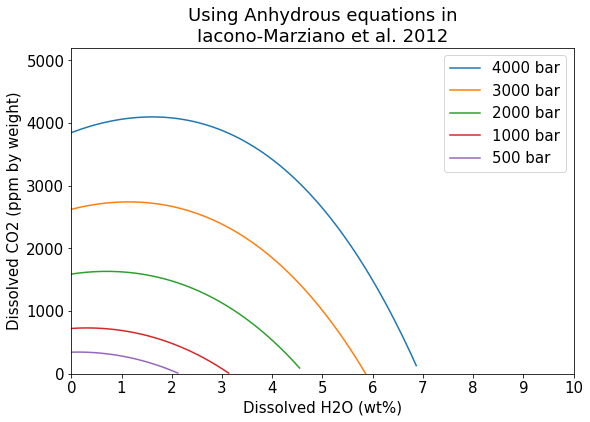

In [4]:
# H2O solubility
# Constants from figure table 6 in Iacono-Marziano et al. 2012. Using Anhydrous!!!!!
a_H2O = 0.54
b_H2O = 1.24
B_H2O = -2.95
C_H2O = 0.02

# CO2 Solubility
# Constants from table 5 in Iacono-Marziano et al. 2012. Using anhydrous
d_H2O = 2.3
d_AI = 3.8
d_FeO_MgO = -16.3
d_Na2O_K2O = 20.1
a_CO2 = 1
b_CO2 = 15.8
C_CO2 = 0.14
B_CO2 = -5.3

# now mass fractions of different species in melt. Table 1 in Iacono-Marziano et al. 2012.
m_SiO2 = 0.4795
m_TiO2 = 0.0167
m_Al2O3 = 0.1732
m_FeO = 0.1024
m_MgO = 0.0576
m_CaO = 0.1093
m_Na2O = 0.034
m_K2O = 0.0199
m_P2O5 = 0.0051

# molar masses in g/mol
M_SiO2 = 60
M_TiO2 = 79.866
M_Al2O3 = 101.96
M_FeO = 71.844
M_MgO = 40.3044
M_CaO = 56
M_Na2O = 61.97
M_K2O = 94.2
M_P2O5 = 141.94

# convert mass fractions to mol fractions
#total moles 
x = (m_SiO2/M_SiO2)+(m_TiO2/M_TiO2)+(m_Al2O3/M_Al2O3)+(m_FeO/M_FeO)+(m_MgO/M_MgO)+\
    (m_CaO/M_CaO)+(m_Na2O/M_Na2O)+(m_K2O/M_K2O)+(m_P2O5/M_P2O5)
x_SiO2 = (m_SiO2/M_SiO2)/x
x_TiO2 = (m_TiO2/M_TiO2)/x
x_Al2O3 = (m_Al2O3/M_Al2O3)/x
x_FeO = (m_FeO/M_FeO)/x
x_MgO = (m_MgO/M_MgO)/x
x_CaO = (m_CaO/M_CaO)/x
x_Na2O = (m_Na2O/M_Na2O)/x
x_K2O = (m_K2O/M_K2O)/x
x_P2O5 = (m_P2O5/M_P2O5)/x

# calculate NBO/O anhydrous. Appendix A in Iacono-Marziano et al. 2012
NBO_O = (2*(x_K2O+x_Na2O+x_CaO+x_MgO+x_FeO-x_Al2O3))/ \
        (2*x_SiO2+2*x_TiO2+3*x_Al2O3+x_MgO+x_FeO+x_CaO+x_Na2O+x_K2O)

# Calculate some constants
x_AI = x_Al2O3/(x_CaO+x_K2O+x_Na2O)
A1 = x_AI*d_AI+(x_FeO+x_MgO)*d_FeO_MgO\
     +(x_Na2O+x_K2O)*d_Na2O_K2O+b_CO2*NBO_O\
     +B_CO2
A2 = b_H2O*NBO_O+B_H2O

# molar masses of H2O and CO2
M_H2O = 18.01528
M_CO2 = 44.01

# The total H and C mole fractions
mCO2tot=600.0e-6 #weight ppm
mH2Otot=1000e-6
xCO2tot=(mCO2tot/M_CO2)/x
xH2Otot=(mH2Otot/M_H2O)/x

# set total pressure and temperature
T = 1473.0 # kelvin
PP = [4000,3000,2000,1000,500]
xxCO2 = []
for P in PP:


    # all the annoying constants!
    B1 = C_CO2*P/T+A1
    B2 = C_H2O*P/T+A2
    F1 = np.log(1e-6)+B1
    F2 = np.log(1/(M_H2O*x*100))+B2

    m_H2O = np.linspace(0,.1,100)
    xCO2 = []


    for i in range(0,len(m_H2O)):
        x_H2O = m_H2O[i]/(x*M_H2O)
        PH2O = np.exp((np.log(x_H2O)-F2)/a_H2O)
        PCO2 = P-PH2O
        xCO2.append(np.exp(x_H2O*d_H2O+a_CO2*np.log(PCO2)+F1))

    xxCO2.append(xCO2)
    
xxCO2 = np.array(xxCO2)
    

plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[9,6],sharex=True)

for i in range(0,len(PP)):
    
    ax.plot(m_H2O*100,xxCO2[i,:]*1e6,label=str(PP[i])+' bar')

ax.set_ylim(0,5200)
ax.set_xlim(0,10)
ax.set_xticks(np.arange(0,11,1))
ax.legend()
ax.set_ylabel('Dissolved CO2 (ppm by weight)')
ax.set_xlabel('Dissolved H2O (wt%)')
ax.set_title('Using Anhydrous equations in\nIacono-Marziano et al. 2012')
plt.show()


Seems to reproduce Figure 7a.